# Import module

In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
# from sklearn.linear_model import LinearRegression,Ridge,Lasso
# from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

# Load data

In [8]:
df = yf.download("AAPL", start="2000-01-01", end="2023-12-31")
# df.columns
X = df[['Open','High','Low','Volume']]
y = df['Close']

[*********************100%%**********************]  1 of 1 completed


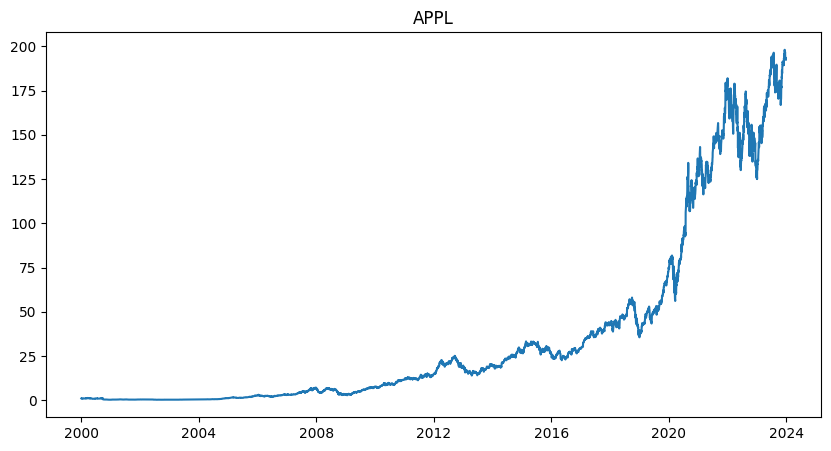

In [9]:
plt.figure(figsize=(10,5))
plt.plot(y.index,y)
plt.title('APPL')
plt.show()

# Time Series Splits

In [ ]:
N_SPLITS =20
tscv = TimeSeriesSplit(n_splits=N_SPLITS)

In [ ]:
model = LinearRegression()

RMSE: 0.3036777890999329, R2: 0.989711828576883


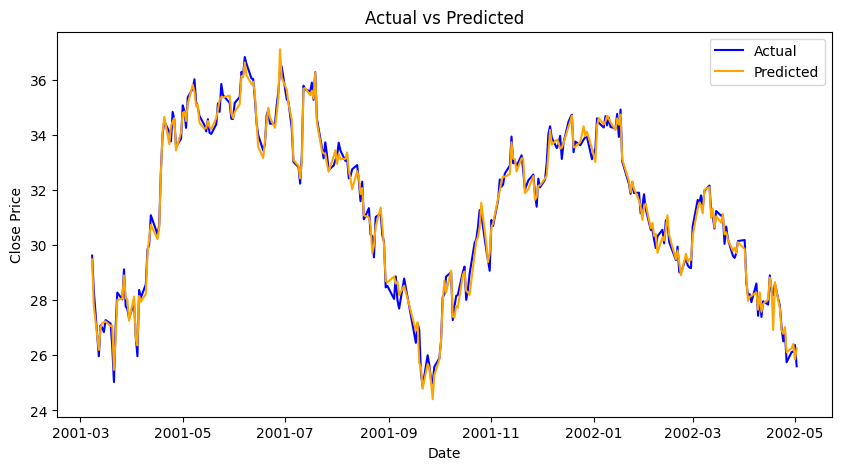

RMSE: 0.25042818820237855, R2: 0.9771564834833587
RMSE: 0.14201080994266788, R2: 0.986290933920107


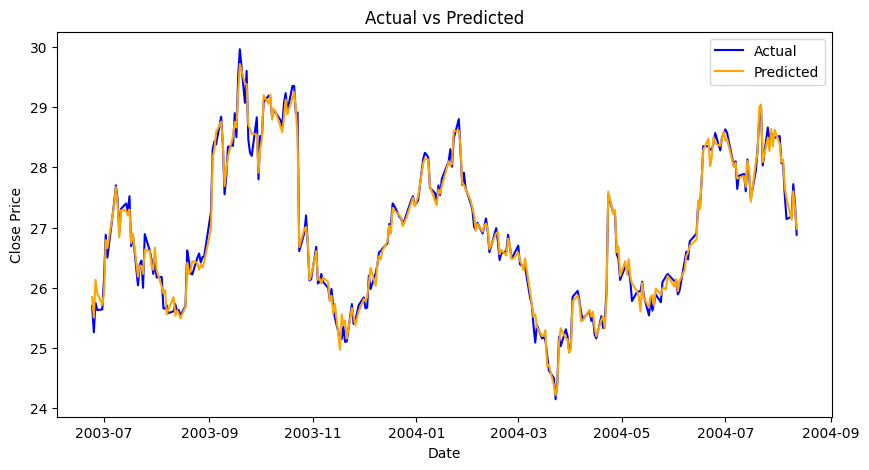

RMSE: 0.10239789085485174, R2: 0.9927499975012242
RMSE: 0.12774770041702277, R2: 0.9957250336402648


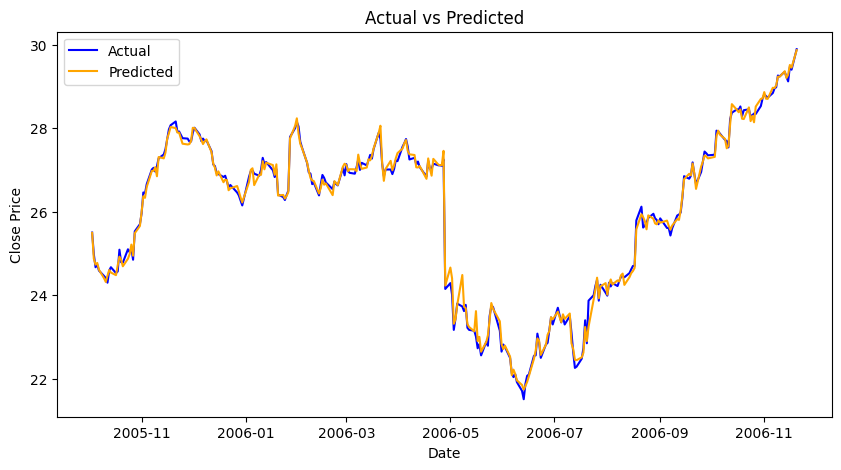

RMSE: 0.16237544248199998, R2: 0.9949954953225439
RMSE: 0.29803060816311316, R2: 0.9954577042692041


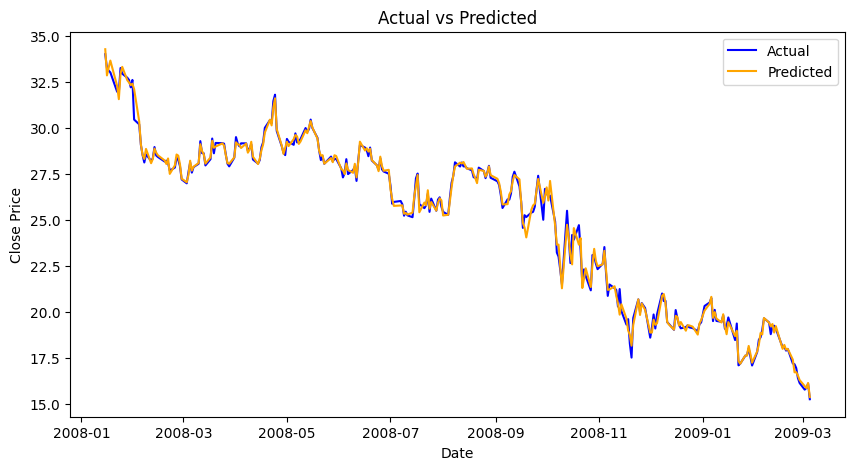

RMSE: 0.1513349527339548, R2: 0.9987251705948348
RMSE: 0.16720170386115277, R2: 0.9887879298523103


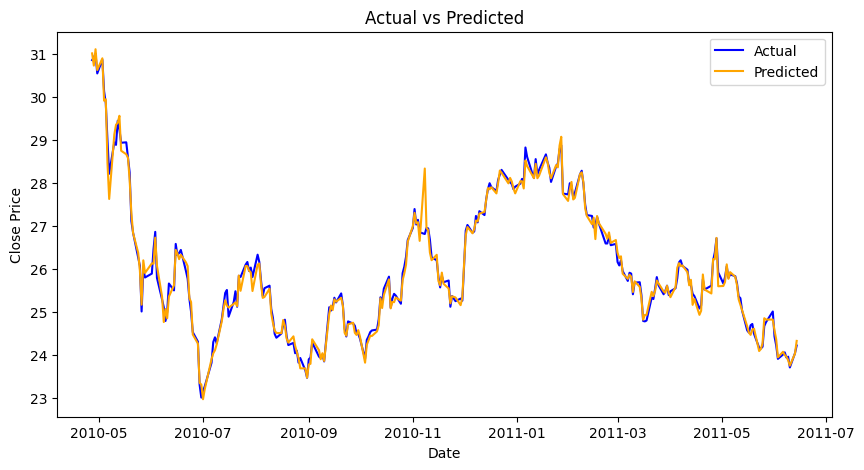

RMSE: 0.1583786078386268, R2: 0.9959704934886873
RMSE: 0.14232126244276783, R2: 0.9972614128840144


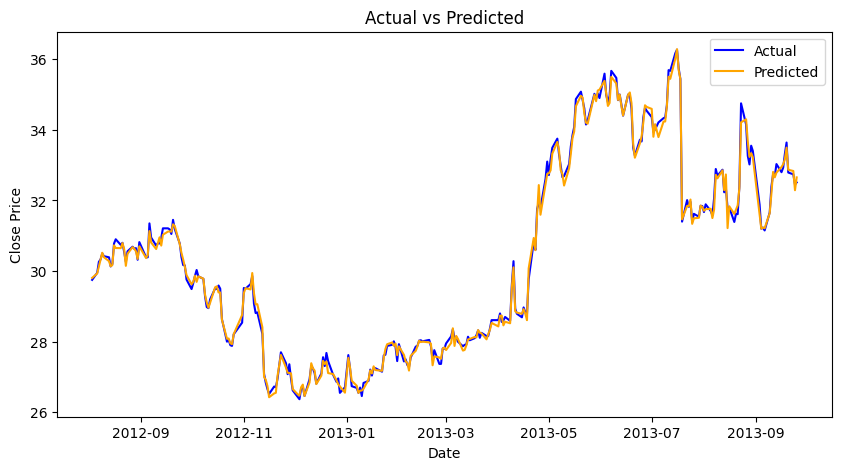

RMSE: 0.19606667182185575, R2: 0.9975595072024357
RMSE: 0.2643168534662519, R2: 0.9959275030825003


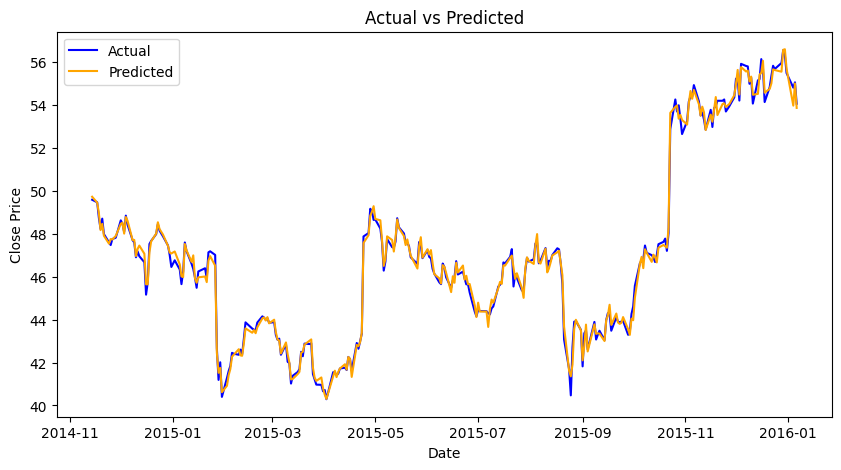

RMSE: 0.26017544995592307, R2: 0.9967772108670877
RMSE: 0.42226430630870376, R2: 0.9981545221761835


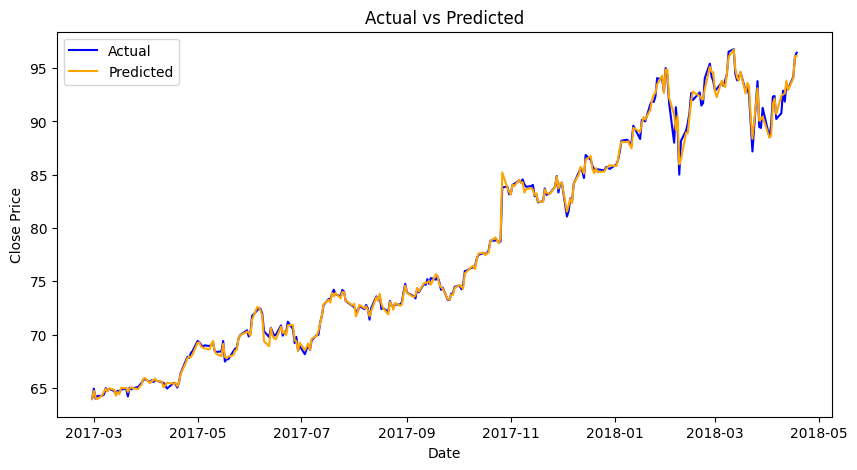

RMSE: 0.5445770240962491, R2: 0.9963698973480537
RMSE: 1.4376886713544166, R2: 0.9960774328703617


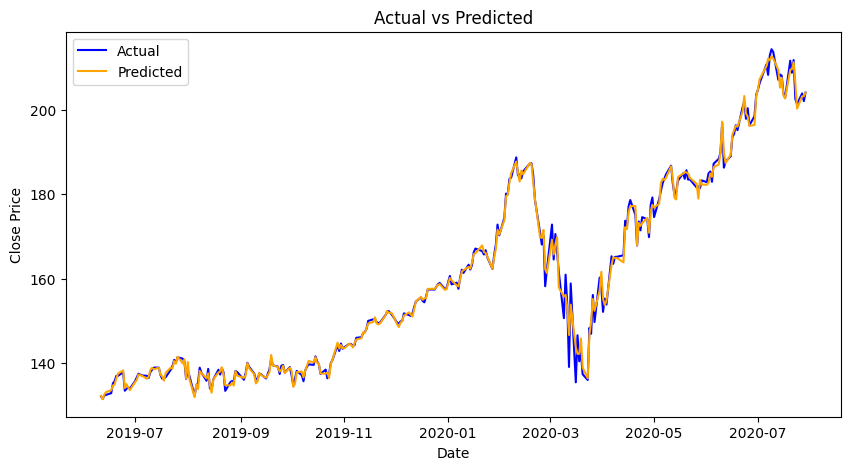

RMSE: 1.208878447615197, R2: 0.9983340238362687
RMSE: 2.138631554029256, R2: 0.9953798863122049


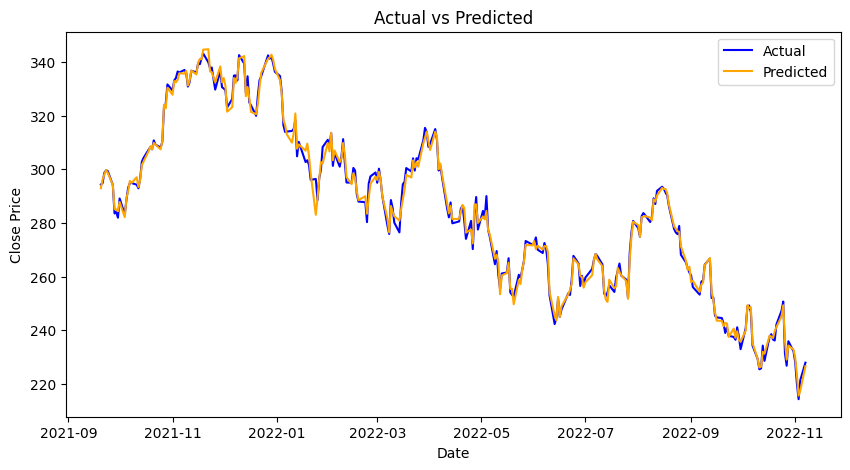

RMSE: 1.5198185648499958, R2: 0.9988518653412969


In [ ]:
for i,(train_index, test_index) in enumerate(tscv.split(X)):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the model

    model.fit(x_train, y_train)
    # Make predictions and evaluate the model
    predictions = model.predict(x_test)
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'RMSE: {rmse}, R2: {r2}')
    # Plot the actual vs predicted values
    if i % 2 == 0:
        plt.figure(figsize=(10, 5))
        plt.plot(y_test.index, y_test, label='Actual',color = 'blue')
        plt.plot(y_test.index, predictions, label='Predicted', color = 'orange')
        plt.title('Actual vs Predicted')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

Test with non-training data

In [ ]:
test_df = yf.download("AAPL", start="2000-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
X_test = test_df[['Open','High','Low','Volume']]
y_test = test_df['Close']

In [ ]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MSE: {mse}, R2: {r2}')

MSE: 0.24840360735242012, R2: 0.9999046712527957


In [ ]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})

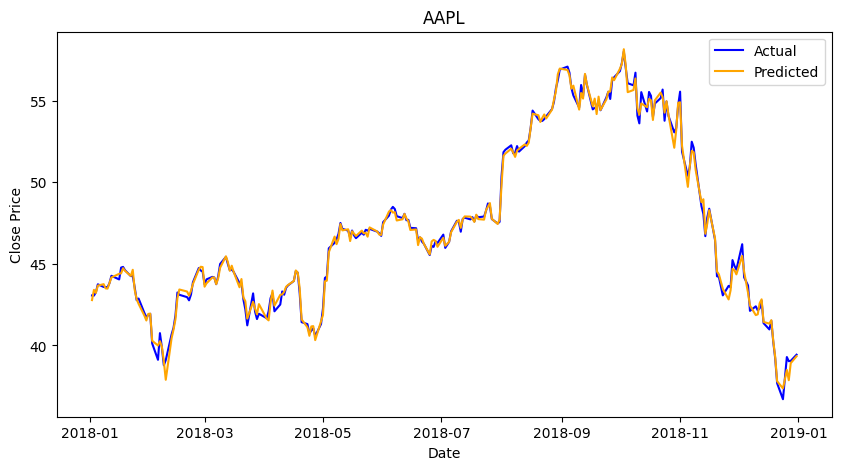

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results['Actual']['2018-01-01':'2019-01-01'], label='Actual',color = 'blue')
plt.plot(results['Predicted']['2018-01-01':'2019-01-01'], label='Predicted', color = 'orange')
plt.title('AAPL')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Random Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(x_test)
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 0.6906449738606483, R2: 0.9999388174665075


In [ ]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

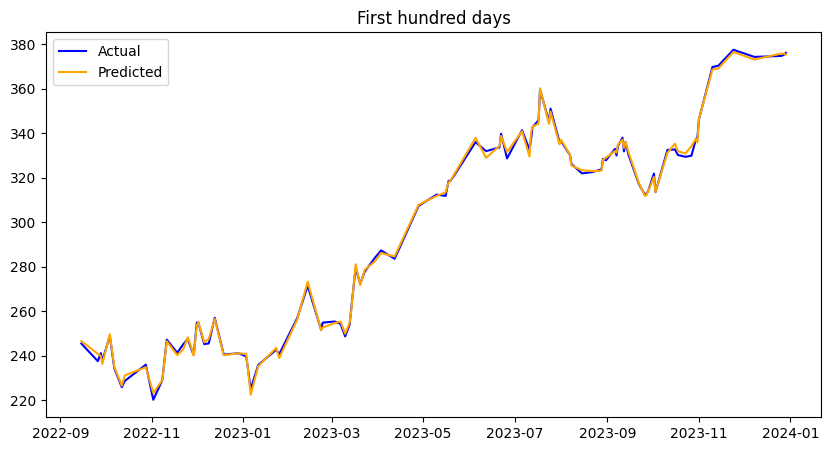

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label = 'Actual',color = 'blue')
plt.plot(results['Predicted'][-100:],label = 'Predicted',color = 'orange')
plt.title('First hundred days')
plt.legend()
plt.show()

Test with non-training data

In [ ]:
test_df = yf.download("AAPL", start="2000-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
X_test = test_df[['Open', 'High', 'Low', 'Volume']]
y_test = test_df['Close']

In [ ]:
pred = model.predict(X_test)

In [ ]:
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 0.4375778201926367, R2: 0.9999267317874557


In [ ]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

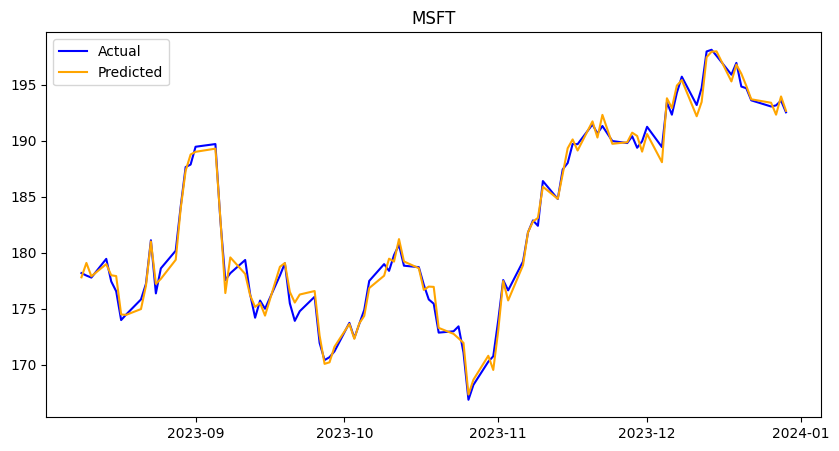

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'][-100:],label = 'Actual',color = 'blue')
plt.plot(results['Predicted'][-100:],label = 'Predicted',color = 'orange')
plt.title('MSFT')
plt.legend()
plt.show()

GridSearch

In [ ]:
data = yf.download("MSFT", start="2000-01-01", end="2023-12-31")
X,y = data[['Open','High','Low','Volume']],data['Close']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ridge_params = {'alpha': [10**i for i in range(-10,10)]}
lasso_params = {'alpha': [10**1 for i in range(-10,10)]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=3)

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

print(f'Best Ridge Params: {ridge_grid.best_params_}')
print(f'Best Lasso Params: {lasso_grid.best_params_}')

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.467e+03, tolerance: 2.632e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.365e+03, tolerance: 2.506e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Best Ridge Params: {'alpha': 1e-10}
Best Lasso Params: {'alpha': 10}


C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.365e+03, tolerance: 2.506e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.452e+03, tolerance: 2.561e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

RIDGE

In [ ]:
model = Ridge(alpha = 1e-10)

In [ ]:
model.fit(X_train,y_train)

Ridge(alpha=1e-10)

In [ ]:
pred = model.predict(X_test)

In [ ]:
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse},R2: {r2}')

RMSE: 0.6452620829155278,R2: 0.999945370127745


In [ ]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

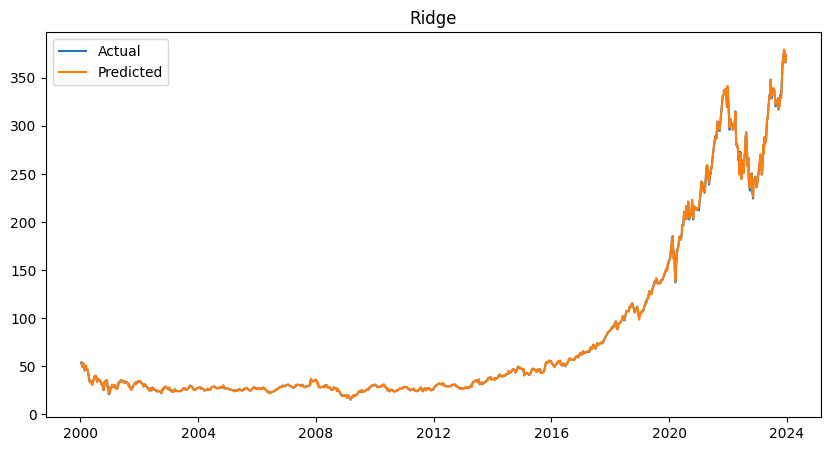

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'],label ='Actual')
plt.plot(results['Predicted'],label = 'Predicted')
plt.title('Ridge')
plt.legend()
plt.show()

LASSO

In [ ]:
model = Lasso(alpha=10)

In [ ]:
model.fit(X_train,y_train)

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.065e+03, tolerance: 3.850e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [ ]:
pred = model.predict(X_test)

In [ ]:
rmse = root_mean_squared_error(pred,y_test)
r2 = r2_score(pred,y_test)
print(f'RMSE: {rmse},R2: {r2}')

RMSE: 1.480874860090034,R2: 0.9997115068087675


In [ ]:
results = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
results.sort_index(inplace=True)

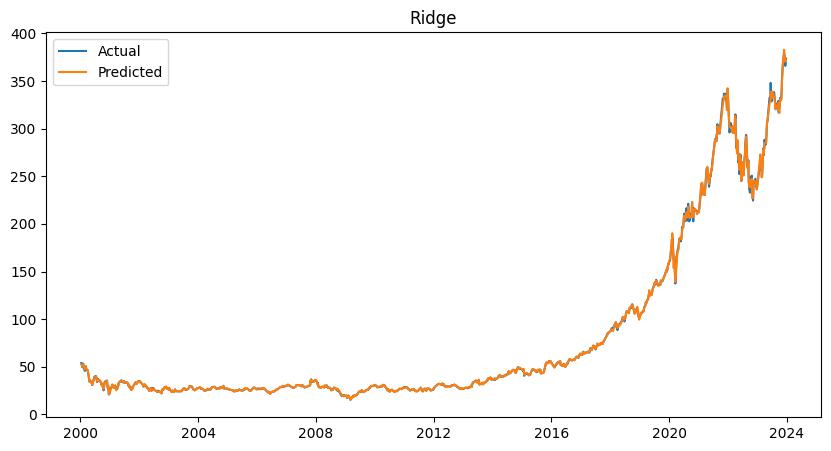

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results['Actual'],label ='Actual')
plt.plot(results['Predicted'],label = 'Predicted')
plt.title('Ridge')
plt.legend()
plt.show()